#   Heart Failure Prediction
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

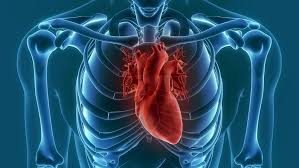

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df=pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot: >

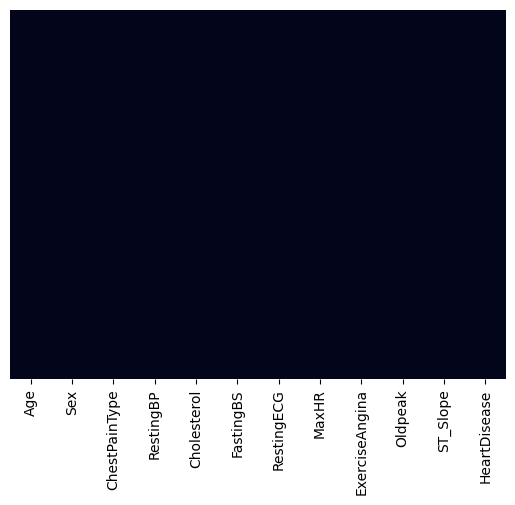

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

we can see that there is no null values present in the dataframe

In [5]:
#I have used the fit_transform() method in order to add label encoder functionality pointed by the object to the data variable. 
#I have printed the unique code with respect to the Gender

my_label = preprocessing.LabelEncoder()   
   
df[ 'Sex']= my_label.fit_transform(df[ 'Sex'])   
print(df[ 'Sex' ].unique())

df[ 'ChestPainType' ]= my_label.fit_transform(df[ 'ChestPainType' ])   
print(df[ 'ChestPainType' ].unique())

df[ 'RestingECG' ]= my_label.fit_transform(df[ 'RestingECG' ])   
print(df[ 'RestingECG' ].unique())

df[ 'ExerciseAngina' ]= my_label.fit_transform(df[ 'ExerciseAngina' ])   
print(df[ 'ExerciseAngina' ].unique())

df[ 'ST_Slope' ]= my_label.fit_transform(df[ 'ST_Slope' ])   
print(df[ 'ST_Slope' ].unique())

df.head(5)

[1 0]
[1 2 0 3]
[1 2 0]
[0 1]
[2 1 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


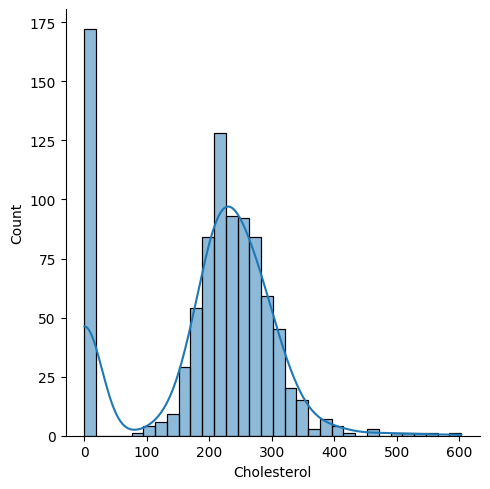

In [6]:
sns.displot(data=df,x='Cholesterol',kde=True)

we can see that theres outliers present in the cholesterol column .so we have to remove the outliers!!

In [7]:
q1=df.Cholesterol.quantile(0.25)
q3=df.Cholesterol.quantile(0.75)
q1,q3

(173.25, 267.0)

In [8]:
IQR=q3-q1
IQR

93.75

In [9]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
lower_limit,upper_limit

(32.625, 407.625)

In [10]:
df[(df.Cholesterol<lower_limit)|(df.Cholesterol>upper_limit)].head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,0,1,113,468,0,1,127,0,0.0,2,0
30,53,1,2,145,518,0,1,130,0,0.0,1,1
69,44,1,0,150,412,0,1,170,0,0.0,2,0
76,32,1,0,118,529,0,1,130,0,0.0,1,1
103,40,1,0,120,466,1,1,152,1,1.0,1,1


In [11]:
df1=df[(df.Cholesterol>lower_limit)&(df.Cholesterol<upper_limit)]
df1.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


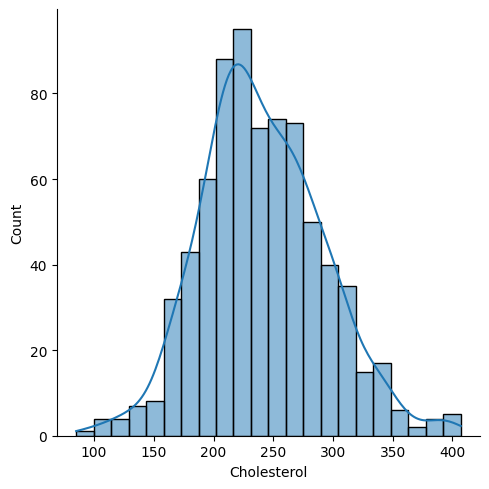

In [12]:
sns.displot(data=df1,x='Cholesterol',kde=True)

we can observe from the graph that the average cholesterol level is in between 200-250

In [13]:
df1.Cholesterol.mean()

241.03809523809525

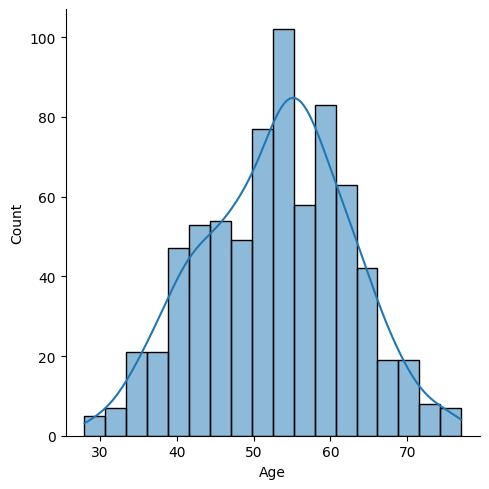

In [14]:

sns.displot(data=df1,x='Age',kde=True)

people are experiencing heart failures the most at the age of above 50 

In [15]:
df1['Age'].mean()

52.903401360544215

In [16]:
df1.Sex.value_counts()

1    557
0    178
Name: Sex, dtype: int64

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

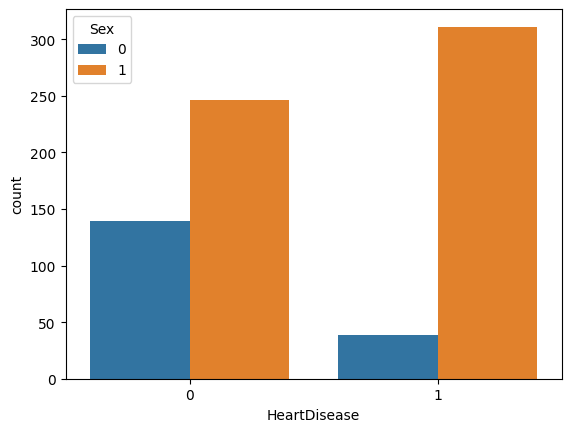

In [17]:
sns.countplot(x='HeartDisease',hue='Sex',data=df1)

rate of heart failure is higher

In [18]:
#average age of male who have heart disease
round(df1[(df.HeartDisease ==  1) & (df.Sex == 1)].Age.mean())

C:\Users\Arpita Das\AppData\Local\Temp\ipykernel_7124\3055246835.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  round(df1[(df.HeartDisease ==  1) & (df.Sex == 1)].Age.mean())


56

In [19]:
#average age of female who have heart disease
round(df1[(df.HeartDisease == 1) & (df.Sex == 0)].Age.mean())

C:\Users\Arpita Das\AppData\Local\Temp\ipykernel_7124\975931911.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  round(df1[(df.HeartDisease == 1) & (df.Sex == 0)].Age.mean())


56

<AxesSubplot: xlabel='ChestPainType', ylabel='Age'>

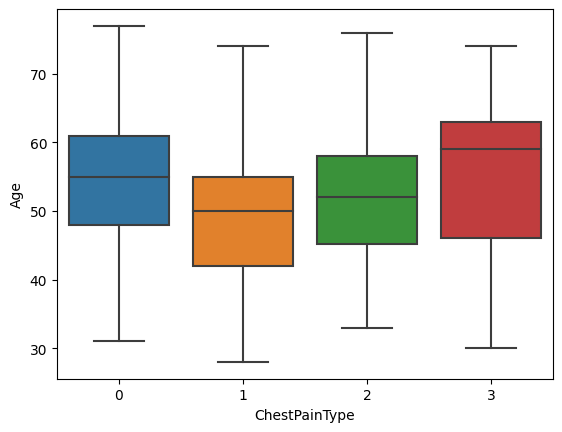

In [20]:
sns.boxplot(x='ChestPainType',y='Age',data=df1)

among the 4 types of chestpain types this graph shows that the age group where individual types are been dominent/most frequent

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

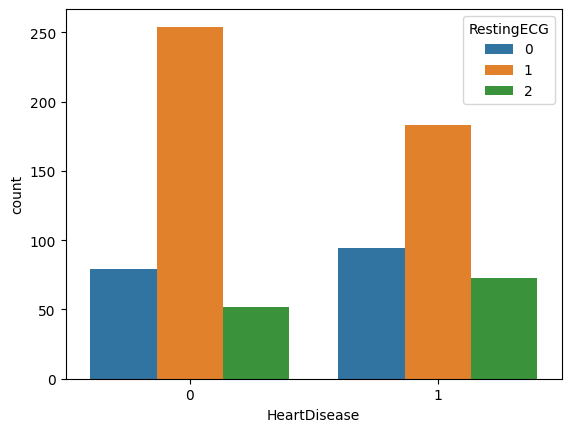

In [21]:
sns.countplot(x='HeartDisease',hue='RestingECG',data=df1)

Young patients with heart failure often have minor ECG abnormalities in the absence of major ECG abnormalities.

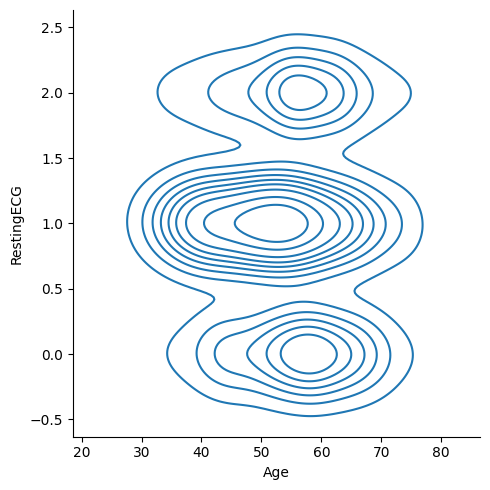

In [22]:
sns.displot(data=df1,x='Age',y='RestingECG',kind='kde')

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

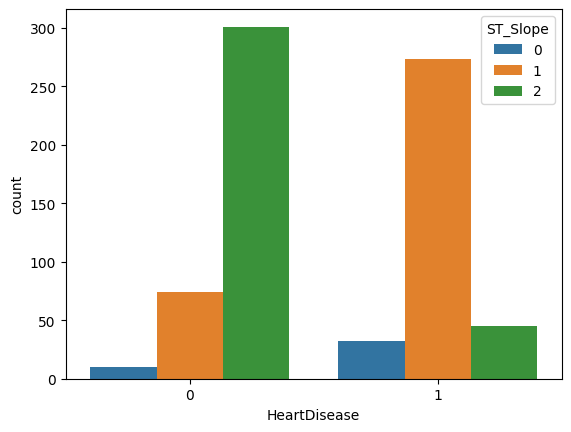

In [23]:
sns.countplot(x='HeartDisease',data=df1,hue='ST_Slope')

we can observe that those having a Flat ST slope are most likely to have heart failure than those having an upper ST slpoe

<AxesSubplot: xlabel='ExerciseAngina', ylabel='Age'>

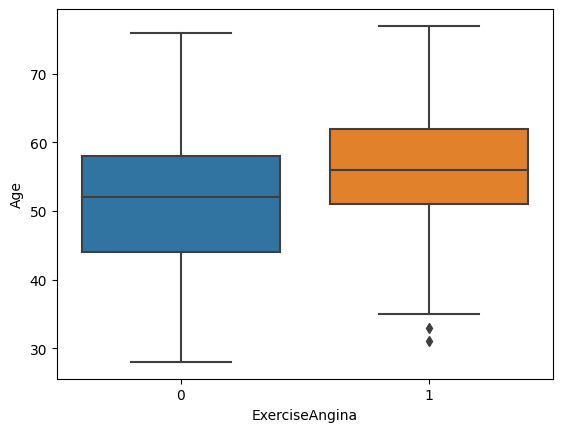

In [24]:
sns.boxplot(x='ExerciseAngina',data=df1,y='Age')

# model making

In [25]:
x=df1.drop(['HeartDisease'],axis=1)
y=df1['HeartDisease']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel=LogisticRegression()

In [29]:
logmodel.fit(x_train,y_train)

C:\Users\Arpita Das\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
logmodel.score(x,y)

0.854421768707483

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_pred=logmodel.predict(x_test)

In [33]:
score=accuracy_score(y_test,y_pred)*100
score

85.03401360544217

In [34]:
logmodel.predict([[49,0,2,160,180,0,1,156,0,1.0,1]])

C:\Users\Arpita Das\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [41]:
logmodel.predict_proba([[49,0,2,160,180,0,1,156,0,1.0,1]])

C:\Users\Arpita Das\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.86554897, 0.13445103]])

In [35]:
y.head(5)

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [37]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.848776,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.835086,{'n_estimators': 10}
2,logistic_regression,0.845328,{'C': 5}


We see that the highest accuracy for the test set is achieved by Logistic Regression which is equal to 84.51%.

<AxesSubplot: >

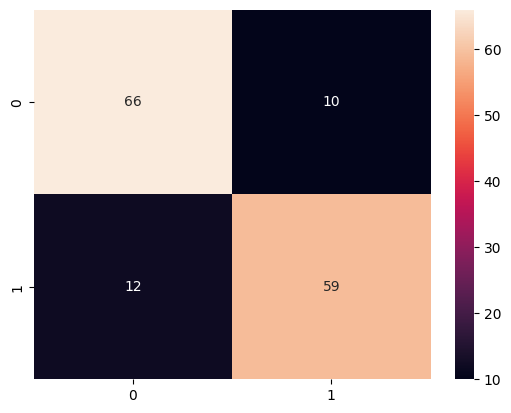

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
sns.heatmap(cm,annot=True)

# conclusion

Heart Disease is one of the major concerns for society today.

It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data.